In [1]:
from fenics import *
import numpy as np 
import matplotlib.pyplot as plt 
from mshr import *

In [2]:
# Making mesh
domain = Circle(Point(0,0),1)
mesh = generate_mesh(domain,64)
# Define function space
V = FunctionSpace(mesh,'P',1)

In [3]:
# Defining load
beta = 8
R0 = 0.6
p = Expression('4*exp(-pow(beta,2)*(pow(x[0],2)+pow(x[1]-R0,2)))', degree=1,beta=beta,R0=R0)

In [4]:
# Define boundary conditions
def boundary(x,on_boundary):
    return on_boundary

bc = DirichletBC(V,0,boundary)

In [5]:
# Define variational problem
w = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(w),grad(v))*dx
L = p*v*dx

w = Function(V)
solve(a==L,w,bc)

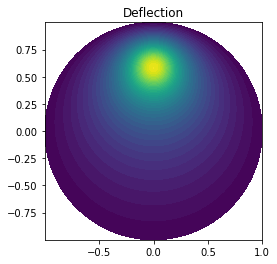

In [6]:
p = interpolate(p,V) # returns Function object
plot(w,title='Deflection')
plt.show()

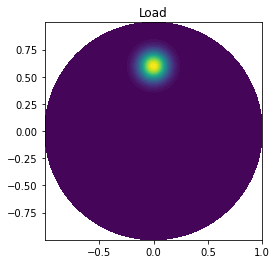

In [7]:
plot(p,title='Load')
plt.show()

In [8]:
vtkfile_w = File('poisson_membrane/deflection.pvd')
vtkfile_w << w 
vtkfile_p = File('poisson_membrane/load.pvd')
vtkfile_p << p  

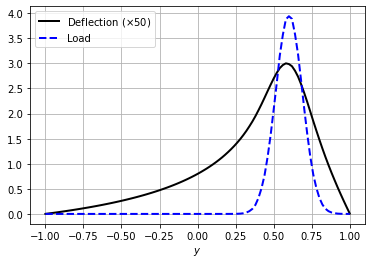

In [12]:
tol = 0.001 # avoid hitting points outside the domain 
y = np.linspace(-1 + tol, 1 - tol, 101) 
points = [(0, y_) for y_ in y] # 2D points 
w_line = np.array([w(point) for point in points]) 
p_line = np.array([p(point) for point in points]) 
plt.plot(y, 50*w_line, 'k', linewidth=2) # magnify w 
plt.plot(y, p_line, 'b--', linewidth=2) 
plt.grid(True) 
plt.xlabel(r'$y$')
plt.legend([r'Deflection ($\times 50$)', 'Load'], loc='upper left')

plt.savefig('poisson_membrane/curves.pdf')
plt.savefig('poisson_membrane/curves.png')

plt.show()